In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from pre_process_2 import pre_processing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LayerNormalization, Dense, LSTM, Bidirectional, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

In [16]:
sequence_length = 5
X, y = pre_processing('Modified_Result_5m_1.csv','with_Indicator_5m_BTC_USDT.csv', sequence_length)

In [17]:
X.shape

(2226, 5, 10)

In [18]:
# y_cat = to_categorical(y, num_classes=3)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [19]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
unique_classes, counts = np.unique(y_train, return_counts=True)
print(unique_classes)
print(counts)
unique_classes, counts = np.unique(y_test, return_counts=True)
print(unique_classes)
print(counts)

(1780, 5, 10)
(446, 5, 10)
(1780,)
(446,)
[0 1 2]
[591 600 589]
[0 1 2]
[151 142 153]


In [20]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
# Build the model
model = Sequential()
model.add(LayerNormalization(input_shape=(X.shape[1], X.shape[2])))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(Dropout(0.3))  # Regularization to prevent overfitting
model.add(LSTM(32, return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))  # Intermediate Dense layer
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Choose an optimizer
optimizer = Adam(learning_rate=0.001)  # You can switch this to SGD, RMSprop, Nadam, etc.

# Compile the model
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=25, batch_size=32)


Epoch 1/25
56/56 [==============================] - 12s 18ms/step - loss: 1.0965 - accuracy: 0.3629
Epoch 2/25
56/56 [==============================] - 1s 19ms/step - loss: 1.0920 - accuracy: 0.3815
Epoch 3/25
56/56 [==============================] - 1s 19ms/step - loss: 1.0933 - accuracy: 0.3657
Epoch 4/25
56/56 [==============================] - 1s 19ms/step - loss: 1.0893 - accuracy: 0.4034
Epoch 5/25
56/56 [==============================] - 1s 19ms/step - loss: 1.0913 - accuracy: 0.3730
Epoch 6/25
56/56 [==============================] - 1s 19ms/step - loss: 1.0870 - accuracy: 0.3904
Epoch 7/25
56/56 [==============================] - 1s 20ms/step - loss: 1.0860 - accuracy: 0.3961
Epoch 8/25
56/56 [==============================] - 1s 18ms/step - loss: 1.0875 - accuracy: 0.3888
Epoch 9/25
56/56 [==============================] - 1s 19ms/step - loss: 1.0868 - accuracy: 0.3843
Epoch 10/25
56/56 [==============================] - 2s 27ms/step - loss: 1.0864 - accuracy: 0.3876
Epoch 11

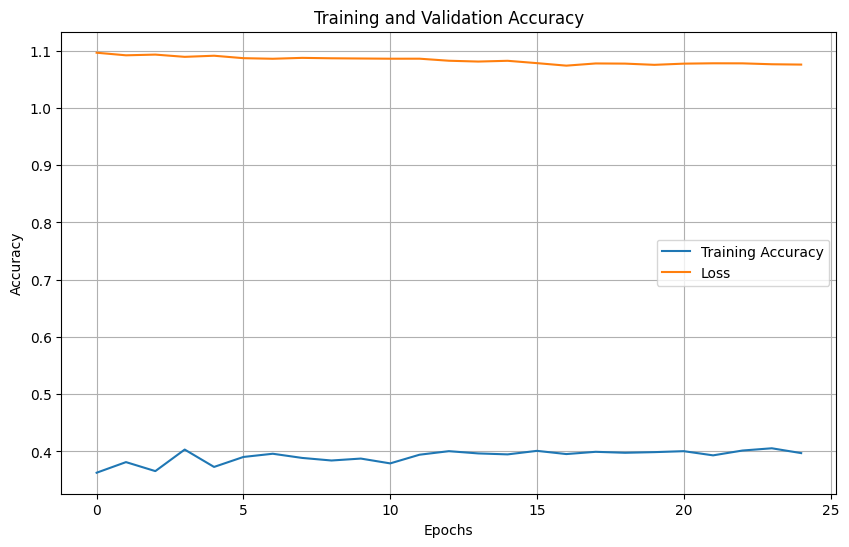

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['loss'], label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

14/14 [==============================] - 3s 7ms/step
0.3901345291479821


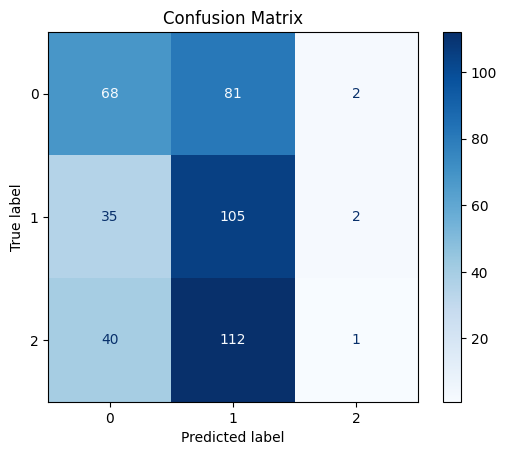

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)
cm = confusion_matrix(y_test, y_pred_classes)
print(accuracy_score(y_test, y_pred_classes))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(3))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()